In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('data.csv')
data

,Unnamed: 0,Video_number,Density_burst,Density_throttling,Quality
0,0,1,2.575873e+07,1.585146e+06,2160
1,1,2,2.093498e+07,1.511580e+06,2160
2,2,3,2.473638e+07,2.061731e+06,2160
3,3,4,1.771628e+07,2.028604e+06,2160
4,4,5,9.715531e+06,8.426243e+05,2160
...,...,...,...,...,...
145,145,21,2.209689e+06,3.304367e+04,360
146,146,22,2.285067e+06,3.488049e+04,360
147,147,23,1.595180e+06,2.678645e+04,360
148,148,24,2.364400e+06,3.232247e+04,360


In [8]:
data['Density_burst']

0      2.575873e+07
1      2.093498e+07
2      2.473638e+07
3      1.771628e+07
4      9.715531e+06
           ...     
145    2.209689e+06
146    2.285067e+06
147    1.595180e+06
148    2.364400e+06
149    3.187846e+06
Name: Density_burst, Length: 150, dtype: float64

In [23]:
for quality in [2160, 1440, 1080, 720, 480, 360]:
    x = []
    y = []
    for i in range(len(data)):
        if data['Quality'][i] == quality:
            x.append(data['Density_burst'][i])
            y.append(data['Density_throttling'][i])
    print(quality)
    print(len(x), len(y))

2160
25 25
1440
25 25
1080
25 25
720
25 25
480
25 25
360
25 25


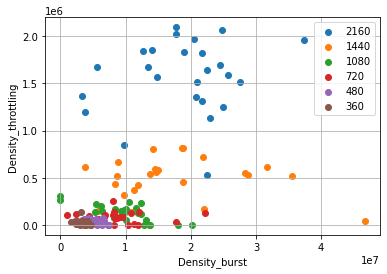

In [25]:
for quality in [2160, 1440, 1080, 720, 480, 360]:
    x = []
    y = []
    for i in range(len(data)):
        if data['Quality'][i] == quality:
            x.append(data['Density_burst'][i])
            y.append(data['Density_throttling'][i])
    plt.scatter(x, y, label=quality)
    
plt.xlabel("Density_burst")
plt.ylabel("Density_throttling")
plt.legend()
plt.grid(True)

plt.show()

In [29]:
X = data[['Density_burst', 'Density_throttling']]
y = data['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [80]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 20)

In [81]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [82]:
knn.score(X_test, y_test)

0.5526315789473685

C:\Users\Roman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Roman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


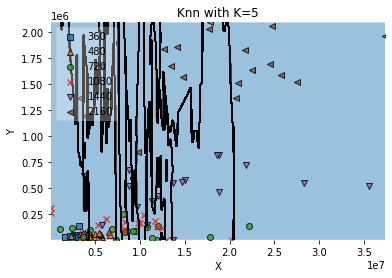

In [40]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train.to_numpy(), y_train.to_numpy(), clf=knn, legend=2)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Knn with K=' + str(5))
plt.show()